# Homework 1

In [1]:
# imports
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

import unyt

# [Problem 1]  Geoid

## Let $\bar g$ be the combined effect of gravity and Centrifugal force:

## $\bar g = \bar g_* + \Omega^2 \bar R$

## We will adopt, for convenience a cylindrical coordinate system where the Earth's rotation is given by:

## $\bar \Omega = \Omega \hat z$

## and $\hat R \perp \hat z$

## and let $\theta$ be the latitude with value 0 at the Equator

## In this case, gravity which is radial in a spherical coordinate system may be written as:

## $\bar g_* = g_* (\cos\theta \, \hat R + \sin\theta \, \hat z)$

# (a) Derive expressions for $\Phi$ at the equator ($\Phi_e$) and pole ($\Phi_p$) as a function of distance from earth's center ($r$), as well as Earth’s mass ($M$) and rotation rate ($\Omega$).

## We will adopt the (great) simplification that Earth is a sphere.  In this case, by Gauss' Law the gravitaional potential is just the mass enclosed:

## $\Phi_g = \frac{-G M(r)}{r}$

## For $r \ge R_\oplus$, we have simply:

## $\Phi_g = \frac{-G M}{r} \;\;\;  r\ge R_\oplus$

## We recall the Centifugal force is:

## $F_C = \Omega^2 \bar R$

## This motivates a potential:

## $\Phi_C = -\frac{1}{2} \Omega^2 R^2$

## And we recognize that $R = r \cos\theta$ at the surface

## Therefore, our two potentials at Pole $\Phi_p$ and Equator $\Phi_e$ are:

## $\Phi_p =  \frac{-G M}{r}$

## $\Phi_e =  \frac{-G M}{r} - \frac{1}{2} \Omega^2 r^2$

# (b) Using these expressions, estimate the size of the equatorial bulge of the geoid, i.e., how much larger the equatorial radius is than the polar radius

## We will define the geoid to be the potential at the pole with $r_p=R_\oplus$ and then solve for the bulge  at the Equator i.e. $r_e = R_\oplus + b$ 

## The geoid will have a constant potential, meaning:

## $\Phi_e = \Phi_p$

## This gives:

## $\frac{-G M}{R_\oplus + b} - \frac{1}{2} \Omega^2 (R_\oplus + b)^2 = \frac{-G M}{R_\oplus}$

## Let us Taylor expand to leading order in $b$, noting:

## $\frac{1}{x+\epsilon} \approx \frac{x-\epsilon}{x^2}$

## This gives:

## $\frac{-G M (R_\oplus-b)}{R_\oplus^2} - \frac{1}{2} \Omega^2 (R_\oplus^2 + 2R_\oplus b) = \frac{-G M}{R_\oplus}$

## The $R_\oplus$ entry in the first term cancels with the RHS, leaving:

## $\frac{G M b}{R_\oplus^2} - \frac{1}{2} \Omega^2 (R_\oplus^2 + 2R_\oplus b) = 0$

## Rearranging a bit:

## $b \left ( \frac{G M}{R_\oplus^2} - \Omega^2 R_\oplus \right ) = \frac{1}{2} \Omega^2 R_\oplus^2$

## And at last:

## $b  = \frac{\Omega^2 R_\oplus^2}{2 \left ( \frac{G M}{R_\oplus^2} - \Omega^2 R_\oplus \right )}$

## Which is the ratio of the Centifugal potential at the Equator to 2x the difference in gravitational and Centrifugal forces

## Let's evaluate!

In [11]:
Omega = 2 * np.pi / (unyt.day)
R_Earth = 1*unyt.R_Earth
M = 1*unyt.M_Earth

In [12]:
b = Omega**2 * R_Earth**2 / 2 / (unyt.G_mks * M / R_Earth**2 - Omega**2 * R_Earth)
b

unyt_quantity(0.00170046, 'Rearth')

In [13]:
## In km
b.to('km')

unyt_quantity(10.83366362, 'km')

# (c)  Calculate how much the rock deflects the ocean surface, i.e., how much higher the geoid is above the rock compared to a location far from the rock.

## Let us give the rock a mass $m$ and assume the depth of the ocean is $s$

## We can ignore the Centrigual force by assuming we are at the Pole

## As in part (b), define our unperturbed geoid to be given by potential at the Pole without the rock:

## $\Phi =  \frac{-G M}{R_\oplus}$

## Our new geoid will have a radius $r = R_\oplus + r'$ with $r' > 0$ (the rock induces a "bulge").

## It's potential will be the reduced graviational potential plus the potential due to the rock:

## $\Phi' =  \frac{-G M}{R_\oplus + r'} - \frac{G}{m}{s}$

## Equating the two and Taylor expanding the first term to leading term in $r'$:

##  $-\frac{G M}{R_\oplus^2} (R_\oplus - r') - \frac{G}{m}{s} = -G M / R_\oplus$

## Re-arranging..

## $\frac{r'}{R_\oplus} = \left ( \frac{m}{M} \right ) \left ( \frac{R_\oplus}{s} \right ) $

----

# [Problem 2] Coriolis with a range of velocities

## Our full momentum equations from Vallis are:

## $\frac{Du}{dt} - \left ( 2 \Omega + \frac{u}{r \cos\theta} \right ) (v \sin\theta - w\cos\theta) = - \frac{1}{\rho r \cos\theta} \frac{\partial p}{\partial \lambda}$
  
## $\frac{Dv}{dt} + \frac{wv}{r} + \left ( 2 \Omega + \frac{u}{r \cos\theta} \right ) u \sin\theta = - \frac{1}{\rho r } \frac{\partial p}{\partial \theta}$

## $\frac{Dw}{dt} - \frac{u^2 + v^2}{r} - 2 \Omega u \cos\theta = - \frac{1}{\rho} \frac{\partial p}{\partial r} - g$

## We are to consider spatially uniform horizontal motion:  $w=0$

## And no pressure gradient $p=const$ or friction

## (a) Plot the meridonial acceleration ($Dv/dt$) vs. purely zonal velocity ($u$)

## Taking our $Dv/dt$ equation and the approximations, we have:

## $\frac{Dv}{dt} + \left ( 2 \Omega + \frac{u}{r \cos\theta} \right ) u \sin\theta = 0$

## For $r = R_\oplus$ and "normal" velocities, e.g. $u = 1 \, \rm m/s$, the 2nd term inside the parenthesis is usually negligble leading to the approximate equation:

## $\frac{Dv}{dt} + 2 \Omega u \sin\theta = 0$

In [17]:
# Indeed, it is typically 100x smaller and ignored
u_r = 1*unyt.m/unyt.s / R_Earth
print(u_r, Omega.to('1/s'))

1.56961033e-07 1/s 7.27220521664304e-05 1/s


## Here, we will allow for very large $u$

In [18]:
u = np.linspace(-1000., 1000., 2001) * unyt.m / unyt.s

In [20]:
def calc_DvDt(u, theta=35*unyt.deg, approx:bool):
    return -1 * (2*Omega + u / R_Earth / np.cos(theta)) * u * np.sin(theta)

In [21]:
DvDt = calc_DvDt(u)

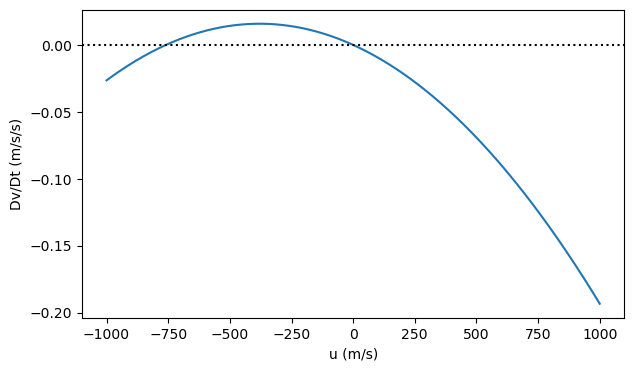

In [27]:
fig = plt.figure(figsize=(7,4))
ax = plt.gca()

ax.plot(u, DvDt.to('m/s/s'), label=r'$\theta=35$\,deg')
ax.axhline(0., color='k', ls=':')

ax.set_xlabel('u (m/s)')
ax.set_ylabel('Dv/Dt (m/s/s)')

plt.show()